<a href="https://colab.research.google.com/github/jiyuutheosum/Machine-Learning/blob/main/Text_Classification_Baraocor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Text Normalization and Text Feature Extraction - Week 13 Laboratory Activity


**Name:** `[ Jalanie Baraocor ] `

**Section:** `[4R8]`

---
**Objective:**

This activity aims to enable students to apply text classification techniques as part of the Text Mining process in
Decision Support Systems. Students will learn how to build, train, and evaluate classification models using textual data. The
activity focuses on transforming preprocessed text into meaningful features, training machine learning models to categorize
text (e.g., sentiment analysis or topic classification), and interpreting model performance through evaluation metrics such as
accuracy, precision, recall, and F1-score.

# **1. Import and Install Packages**

In [ ]:
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from spellchecker import SpellChecker
from textblob import TextBlob
from nltk import pos_tag
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopw

True

# **2. Load the Dataset**

In [ ]:
INPUT_CSV = "/content/drive/MyDrive/Colab Notebooks/dataset.csv"
df = pd.read_csv(INPUT_CSV)
print("Rows:", len(df))
print("Columns:", df.columns.tolist())
assert 'review' in df.columns, "Dataset must have a 'Review' column"
df['review'] = df['review'].astype(str)
df.head(5)

Rows: 46742
Columns: ['Unnamed: 0', 'recommendationid', 'language', 'review', 'Reaction']


,Unnamed: 0,recommendationid,language,review,Reaction
0,0,77057085,english,Is good. Do play.,0
1,1,77052689,english,AAAAAAAA,0
2,2,77049252,english,Fun game,1
3,3,77049089,english,"Great game, worth every penny!",0
4,4,35101272,english,Like,0


# **3. Perform text cleaning on column Review**

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)          # remove symbols/numbers
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)    # limit repeated chars
    text = re.sub(r'\s+', ' ', text).strip()      # remove extra spaces
    tokens = [t for t in text.split() if t not in stop_words]
    return ' '.join(tokens)

df['cleaned'] = df['review'].astype(str).apply(clean_text)
df[['review', 'cleaned']].head()

,review,cleaned
0,Is good. Do play.,good play
1,AAAAAAAA,aa
2,Fun game,fun game
3,"Great game, worth every penny!",great game worth every penny
4,Like,like


# **3.1 Extract text features using BOW**

In [ ]:
cv = CountVectorizer()
X_bow = cv.fit_transform(df['cleaned'])

# Convert to DataFrame for easier viewing
bow_df = pd.DataFrame(X_bow.toarray(), columns=cv.get_feature_names_out())
bow_df.index = df.index  # align indices with main df
print("BoW shape:", X_bow.shape)
display(bow_df.head())

BoW shape: (46742, 31449)


,aa,aad,aaf,aafterbirth,aagame,aagin,aah,aahh,aall,aalsow,...,zowie,zrecznosci,zrobi,zu,zum,zurck,zwar,zwischen,zx,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **3.2 Extract text features using TFIDF**

In [ ]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['cleaned'])

# Convert to DataFrame for inspection
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.index = df.index
print("TF-IDF shape:", X_tfidf.shape)
display(tfidf_df.head())

TF-IDF shape: (46742, 31449)


,aa,aad,aaf,aafterbirth,aagame,aagin,aah,aahh,aall,aalsow,...,zowie,zrecznosci,zrobi,zu,zum,zurck,zwar,zwischen,zx,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **4.1 Perform text classification using BOW**

=== Bag of Words Results ===
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      7105
           1       0.49      0.49      0.49      6918

    accuracy                           0.50     14023
   macro avg       0.50      0.50      0.50     14023
weighted avg       0.50      0.50      0.50     14023



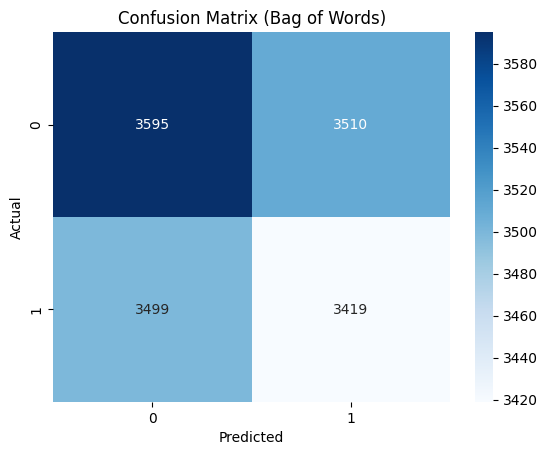

In [ ]:
X = X_bow
y = df['Reaction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Logistic Regression model
model_bow = LogisticRegression(max_iter=2000)
model_bow.fit(X_train, y_train)

# Predictions
y_pred_bow = model_bow.predict(X_test)

# Evaluation
print("=== Bag of Words Results ===")
print(classification_report(y_test, y_pred_bow))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_bow)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix (Bag of Words)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **4.2 Perform text classification using TF-IDF**

=== TF-IDF Results ===
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      7105
           1       0.50      0.50      0.50      6918

    accuracy                           0.50     14023
   macro avg       0.50      0.50      0.50     14023
weighted avg       0.50      0.50      0.50     14023



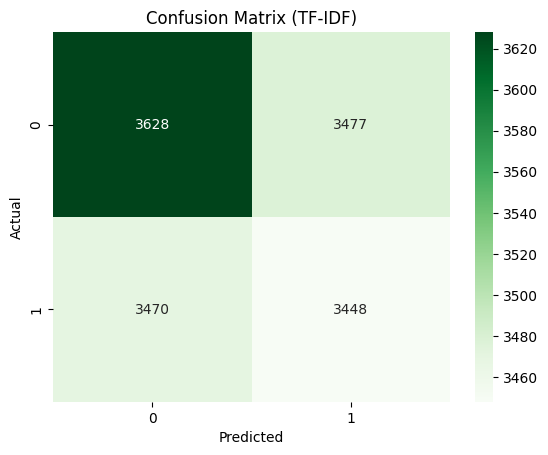

In [ ]:
# Define x and y matrix
X = X_tfidf
y = df['Reaction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Logistic Regression model
model_tfidf = LogisticRegression(max_iter=2000)
model_tfidf.fit(X_train, y_train)

# Predictions
y_pred_tfidf = model_tfidf.predict(X_test)

# Evaluation
print("=== TF-IDF Results ===")
print(classification_report(y_test, y_pred_tfidf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix (TF-IDF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()